In [28]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

path = r'OnlineNewsPopularityReduced.csv'
data = pd.read_csv(path, usecols=list(range(2,61)))
data.head()
data.shape

(4466, 59)

In [29]:
popular = data.shares >= 1400
unpopular = data.shares < 1400
data.loc[popular,'shares'] = 1
data.loc[unpopular, 'shares'] = 0
#data.head()

In [30]:
# count the number of popular and unpopular
def countX(lst, x):
    count = 0
    for ele in lst:
        if (ele == x):
            count = count + 1
    return count
lst = data.shares
x=1
y=0
print(countX(lst,x))
print(countX(lst,y))

2273
2193


In [31]:
from sklearn import cross_validation, metrics
from sklearn.cross_validation import train_test_split

features = list(data.columns[0:57])
#print(features)

# split dataset to 90% training set and 10% test set
X_train, X_test, y_train, y_test = cross_validation.train_test_split(data[features], data['shares'], test_size=0.1, random_state=0, stratify=data['shares'])
print (X_train.shape, X_test.shape)

(4019, 57) (447, 57)


In [32]:
# count the number of popular and unpopular in train set

lst = y_train
x=1
y=0
print(countX(lst,x))
print(countX(lst,y))

2045
1974


In [ ]:
#X_train.head()

In [33]:
mean=X_train.mean(axis=0)
#print(mean)

In [34]:
from copy import deepcopy
X_train_mean_remov = deepcopy(X_train)
#X_train_mean_remov.head()

In [35]:
for i in X_train.columns:
    if 'is' in i:
        X_train_mean_remov[i] = X_train[i]
        #print('Success!')
    else: 
        X_train_mean_remov[i] = X_train[i] - mean[i]
        #print('Nah!')
#X_train.head()

In [ ]:
#X_train_mean_remov.head()

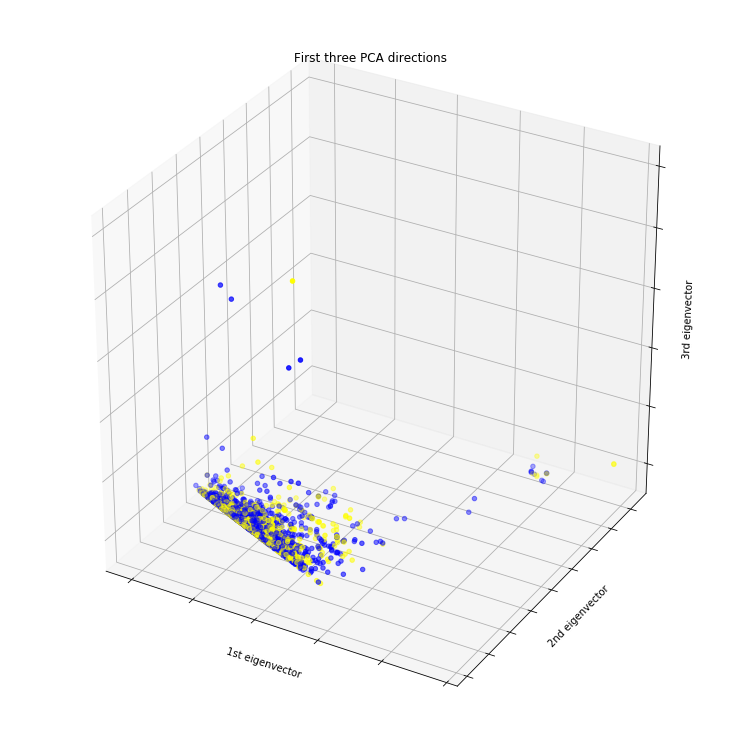

In [61]:
# use pca for feature reduction
import matplotlib
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

pca = PCA(n_components=3, svd_solver='full')
X_train_pca = pca.fit_transform(X_train_mean_remov)
          
# plot the first three PCA dimensions
fig = plt.figure(1, figsize=(10, 10))
ax = Axes3D(fig)#, elev=20, azim=100)

colors = ['yellow', 'blue']
ax.scatter(X_train_pca[:, 0], X_train_pca[:, 1], X_train_pca[:, 2], c=y_train, cmap=matplotlib.colors.ListedColormap(colors)) #c=y, cmap=plt.cm.Set1, edgecolor='k', s=40
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()

In [36]:
X_test_mean_remov = deepcopy(X_test)
for i in X_test.columns:
    if 'is' in i:
        X_test_mean_remov[i] = X_test[i]
        #print('Success!')
    else: 
        X_test_mean_remov[i] = X_test[i] - mean[i]
        #print('Nah!')
X_test.head()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity
2501,9,1029,0.438469,1.0,0.643785,6,1,1,0,4.439261,...,0.225000,0.381440,0.033333,1.0,-0.270679,-0.5,-0.10,0.833333,0.333333,0.333333
2413,9,164,0.672840,1.0,0.842697,2,2,1,1,4.268293,...,0.266667,0.367493,0.033333,0.6,-0.487500,-1.0,-0.05,1.000000,0.400000,0.500000
1304,10,820,0.452830,1.0,0.662192,5,1,1,1,4.287805,...,0.230769,0.388918,0.100000,0.8,-0.242361,-0.5,-0.10,0.400000,0.100000,0.100000
1600,13,605,0.562607,1.0,0.684615,11,1,1,0,5.029752,...,0.304348,0.367045,0.100000,0.8,-0.317460,-0.6,-0.10,0.000000,0.000000,0.500000
875,13,1777,0.449708,1.0,0.631970,36,28,12,0,4.453011,...,0.364341,0.430785,0.062500,1.0,-0.404057,-1.0,-0.10,0.000000,0.000000,0.500000


In [37]:
from sklearn import datasets, svm
from sklearn.feature_selection import SelectPercentile, SelectKBest, f_classif
#from sklearn import linear_model
import numpy as np
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

In [62]:
# feature selection


# Univariate feature selection with F-test for feature scoring
# We use the default selection function: the 10% most significant features
X = X_train_mean_remov.values;
y = y_train.values;
c = np.empty((0))
d = np.empty((0))
e = np.empty((0))
for i in list(range(2,57,2)):
    
    #use k best f score features, see the plot of test acc
    selector = SelectKBest(f_classif, k=i)
    #selector = SelectPercentile(f_classif, percentile=30)

    X_train_reduced = selector.fit_transform(X, y)
    indices = selector.get_support(True)
    #print(indices)
    X_test_reduced = X_test_mean_remov.values[:,indices]

    # apply on naive bayes classifier
    clf = BernoulliNB()
    clf.fit(X_train_reduced, y)
    y_testPred = clf.predict(X_test_reduced)
    y_trainPred = clf.predict(X_train_reduced)

    F1_score_nb = f1_score(y_test.values, y_testPred)
    #F1_score_nb = f1_score(y_train.values, y_trainPred, average='weighted')
    
    train_acc = clf.score(X_train_reduced, y_train.values)
    test_acc = clf.score(X_test_reduced, y_test.values)
    print(train_acc, test_acc, F1_score_nb)

    c = np.append(c, train_acc) 
    d = np.append(d, test_acc)
    e = np.append(e, F1_score_nb)

/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:113: UserWarning: Features [17] are constant.
  UserWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:114: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


0.6193082856431948 0.6353467561521253 0.5873417721518989
0.6212988305548643 0.6420581655480985 0.634703196347032
0.6257775566061209 0.6465324384787472 0.6609442060085837
0.6307539188852949 0.6442953020134228 0.6565874730021599
0.6312515551132123 0.6420581655480985 0.6506550218340612
0.6387160985319731 0.6554809843400448 0.65929203539823
0.6374720079621796 0.6532438478747203 0.660831509846827
0.6382184623040558 0.6599552572706935 0.6666666666666666
0.6352326449365514 0.6510067114093959 0.6593886462882096
0.6392137347598905 0.668903803131991 0.6740088105726872
0.6354814630505101 0.6666666666666666 0.6725274725274725
0.6421995521273949 0.6599552572706935 0.6607142857142858
0.639711370987808 0.6554809843400448 0.6547085201793722
0.6449365513809405 0.6599552572706935 0.6591928251121076
0.6481711868624036 0.6621923937360179 0.6606741573033708
0.6476735506344862 0.6644295302013423 0.6621621621621623
0.6516546404578253 0.6577181208053692 0.6530612244897959
0.6504105498880318 0.6510067114093959

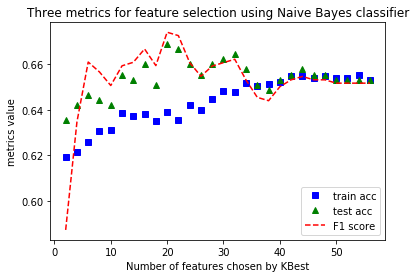

In [63]:
x = np.arange(2,57,2)
plt.plot(x, c, 'bs')
plt.plot(x, d, 'g^')
plt.plot(x, e, 'r--')
plt.xlabel("Number of features chosen by KBest")
plt.ylabel("metrics value")
plt.title("Three metrics for feature selection using Naive Bayes classifier")
plt.legend(["train acc","test acc", "F1 score"], loc="lower right")
plt.show()


In [64]:
# print the feature id according to its feature rank
for i in list(range(1,21)):
    selector = SelectKBest(f_classif, k=i)
    X = X_train_mean_remov.values;
    y = y_train.values;
    final_X_train = selector.fit_transform(X, y)
    indices = selector.get_support(True)
    print(indices)

[39]
[25 39]
[16 25 39]
[10 16 25 39]
[10 16 25 39 43]
[10 16 25 36 39 43]
[10 16 25 36 39 43 46]
[ 7 10 16 25 36 39 43 46]
[ 7 10 16 25 36 39 43 46 47]
[ 7 10 16 23 25 36 39 43 46 47]
[ 7 10 16 23 25 36 39 42 43 46 47]
[ 7 10 15 16 23 25 36 39 42 43 46 47]
[ 7 10 15 16 23 25 36 39 40 42 43 46 47]
[ 7 10 15 16 23 25 36 39 40 42 43 44 46 47]
[ 7 10 15 16 23 25 34 36 39 40 42 43 44 46 47]
[ 5  7 10 15 16 23 25 34 36 39 40 42 43 44 46 47]
[ 5  7 10 15 16 23 25 34 36 39 40 41 42 43 44 46 47]
[ 5  7 10 15 16 23 25 34 36 39 40 41 42 43 44 46 47 50]
[ 5  7 10 15 16 23 25 34 35 36 39 40 41 42 43 44 46 47 50]
[ 5  7 10 15 16 23 24 25 34 35 36 39 40 41 42 43 44 46 47 50]


/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:113: UserWarning: Features [17] are constant.
  UserWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:114: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [38]:
# according to plot above, choose 20 features 

selector = SelectKBest(f_classif, k=20)
X = X_train_mean_remov.values;
y = y_train.values;
final_X_train = selector.fit_transform(X, y)
indices = selector.get_support(True)
#print(indices)
final_X_test = X_test_mean_remov.values[:,indices]


/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:113: UserWarning: Features [17] are constant.
  UserWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:114: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [39]:
# adjust label for linear regression

lr_y_train = deepcopy(y_train)
lr_y_test = deepcopy(y_test)
lr_y_train[lr_y_train < 1] = -1
lr_y_test[lr_y_test < 1] = -1

# popular = data.shares >= 1400
# unpopular = data.shares < 1400
# data.loc[popular,'shares'] = 1
# data.loc[unpopular, 'shares'] = 0
lr_y_test.head()    

2501   -1
2413   -1
1304    1
1600   -1
875    -1
Name: shares, dtype: int64

In [40]:
# linear regression method 
from sklearn.linear_model import LinearRegression


lr = LinearRegression()
lr.fit(final_X_train, lr_y_train.values)
# lr_train_acc = lr.score(final_X_train, lr_y_train.values)
# lr_test_acc = lr.score(final_X_test, lr_y_test.values)
lr_y_train_Pred = lr.predict(final_X_train)
lr_y_test_Pred = lr.predict(final_X_test)

lr_y_train_Pred[lr_y_train_Pred > 0] = 1
lr_y_train_Pred[lr_y_train_Pred < 0] = -1

lr_y_test_Pred[lr_y_test_Pred > 0] = 1
lr_y_test_Pred[lr_y_test_Pred < 0] = -1


lr_train_acc = metrics.accuracy_score(lr_y_train.values, lr_y_train_Pred)
lr_test_acc = metrics.accuracy_score(lr_y_test.values, lr_y_test_Pred)
lr_F1_score = f1_score(lr_y_test.values, lr_y_test_Pred)

print("--------Linear Regression--------")
print("train accuracy is: ", lr_train_acc)
print("test accuracy is: ", lr_test_acc)
print("F1 score is: ", lr_F1_score)
confusion_matrix(y_test.values, lr_y_test_Pred)




--------Linear Regression--------
train accuracy is:  0.6613585469022145
test accuracy is:  0.6733780760626398
F1 score is:  0.6604651162790697


array([[  0,   0,   0],
       [159,   0,  60],
       [ 86,   0, 142]])

In [41]:
# naive bayes
nb = BernoulliNB()
nb.fit(final_X_train, y_train.values)
nb_y_test_Pred = nb.predict(final_X_test)
nb_y_train_Pred = nb.predict(final_X_train)
#print(nb_y_train_Pred)

nb_F1_score = f1_score(y_test.values, nb_y_test_Pred)
nb_train_acc = nb.score(final_X_train, y_train.values)
nb_test_acc = nb.score(final_X_test, y_test.values)

print("--------Naive Bayes--------")
print("train accuracy is: ", nb_train_acc)
print("test accuracy is: ", nb_test_acc)
print("F1 score is: ", nb_F1_score)
confusion_matrix(y_test.values, nb_y_test_Pred)

--------Naive Bayes--------
train accuracy is:  0.6392137347598905
test accuracy is:  0.668903803131991
F1 score is:  0.6740088105726872


array([[146,  73],
       [ 75, 153]])

In [42]:
# logistic regression

from sklearn.linear_model import LogisticRegression
logr = LogisticRegression()
logr.fit(final_X_train, y_train.values)
logr_y_test_Pred = logr.predict(final_X_test)
#logr_y_train_Pred = logr.predict(final_X_train)
#print(logr_y_test_Pred)

logr_F1_score = f1_score(y_test.values, logr_y_test_Pred)
logr_test_acc = logr.score(final_X_test, y_test.values)
logr_train_acc = logr.score(final_X_train, y_train.values)

print("--------Logistic Regression--------")
print("train accuracy is: ", logr_train_acc)
print("test accuracy is: ", logr_test_acc)
print("F1 score is: ", logr_F1_score)
confusion_matrix(y_test.values, logr_y_test_Pred)


--------Logistic Regression--------
train accuracy is:  0.6603632744463797
test accuracy is:  0.6666666666666666
F1 score is:  0.6542923433874711


array([[157,  62],
       [ 87, 141]])

In [43]:
# perceptron

from sklearn.linear_model import Perceptron
pct = Perceptron()
pct.fit(final_X_train, y_train.values)
pct_y_test_Pred = pct.predict(final_X_test)
#pct_y_train_Pred = pct.predict(final_X_train)
#print(pct_y_test_Pred)

pct_F1_score = f1_score(y_test.values, pct_y_test_Pred)
pct_test_acc = pct.score(final_X_test, y_test.values)
pct_train_acc = pct.score(final_X_train, y_train.values)

print("--------Perceptron--------")
print("train accuracy is: ", pct_train_acc)
print("test accuracy is: ", pct_test_acc)
print("F1 score is: ", pct_F1_score)
confusion_matrix(y_test.values, pct_y_test_Pred)


--------Perceptron--------
train accuracy is:  0.46927096292610104
test accuracy is:  0.45861297539149887
F1 score is:  0.43192488262910794


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


array([[113, 106],
       [136,  92]])

In [44]:
# KNN

from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=9)
KNN.fit(final_X_train, y_train.values)

KNN_y_test_Pred = KNN.predict(final_X_test)

KNN_F1_score = f1_score(y_test.values, KNN_y_test_Pred)
KNN_test_acc = KNN.score(final_X_test, y_test.values)
KNN_train_acc = KNN.score(final_X_train, y_train.values)

print("--------K Nearest Neighbors--------")
print("train accuracy is: ", KNN_train_acc)
print("test accuracy is: ", KNN_test_acc)
print("F1 score is: ", KNN_F1_score)
confusion_matrix(y_test.values, KNN_y_test_Pred)


--------K Nearest Neighbors--------
train accuracy is:  0.6892261756655884
test accuracy is:  0.6308724832214765
F1 score is:  0.6325167037861916


array([[140,  79],
       [ 86, 142]])

In [65]:
# SVM RBF paramemter choose
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

# X = final_X_train
X_2d = final_X_train[:, [7,11]]
# y = y_train.values

# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X_transform = scaler.fit_transform(X)
# X_2d_transform = scaler.fit_transform(X_2d)

In [66]:


C_range = np.logspace(-3, 3, 7)
gamma_range = np.logspace(-5, 1, 7)
param_grid = dict(gamma=gamma_range, C=C_range)
cv = StratifiedKFold(n_splits=5)
grid = GridSearchCV(SVC(), param_grid=param_grid, cv=cv)
grid.fit(final_X_train, y_train.values)

print("The best parameters are %s with a score of %0.2f" 
      % (grid.best_params_, grid.best_score_))



The best parameters are {'C': 0.1, 'gamma': 1e-05} with a score of 0.62


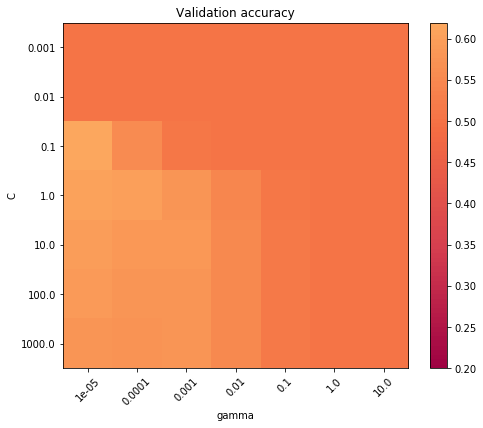

In [67]:
# Utility function to move the midpoint of a colormap to be around
# the values of interest.
from matplotlib.colors import Normalize
class MidpointNormalize(Normalize):

    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y))
    
    
scores = grid.cv_results_['mean_test_score'].reshape(len(C_range),
                                                     len(gamma_range))

# Draw heatmap of the validation accuracy as a function of gamma and C
#
# The score are encoded as colors with the hot colormap which varies from dark
# red to bright yellow. As the most interesting scores are all located in the
# 0.92 to 0.97 range we use a custom normalizer to set the mid-point to 0.92 so
# as to make it easier to visualize the small variations of score values in the
# interesting range while not brutally collapsing all the low score values to
# the same color.

plt.figure(figsize=(8, 6))
plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)
plt.imshow(scores, interpolation='nearest', cmap=plt.cm.Spectral,
           norm=MidpointNormalize(vmin=0.2, midpoint=0.92))
plt.xlabel('gamma')
plt.ylabel('C')
plt.colorbar()
plt.xticks(np.arange(len(gamma_range)), gamma_range, rotation=45)
plt.yticks(np.arange(len(C_range)), C_range)
plt.title('Validation accuracy')
plt.show()

In [45]:
# SVM RBF 
from sklearn.model_selection import cross_val_score

svmrbf = svm.SVC(C=0.1, gamma=1e-5, probability=True)
svmrbf.fit(final_X_train, y_train.values)

#cross validation accuracy
scores = cross_val_score(svmrbf, final_X_train, y_train.values, cv=5)
svm_rbf_trainacc = scores.mean()
svm_rbf_testacc = svmrbf.score(final_X_test, y_test.values)

svmrbf_y_test_Pred = svmrbf.predict(final_X_test)
svmrbf_F1_score = f1_score(y_test.values, svmrbf_y_test_Pred)

print("--------SVM RBF kernel --------")
print("train accuracy is: ", svm_rbf_trainacc)
print("test accuracy is: ", svm_rbf_testacc)
print("F1 score is: ", svmrbf_F1_score)
confusion_matrix(y_test.values, svmrbf_y_test_Pred)


--------SVM RBF kernel --------
train accuracy is:  0.6193035445437817
test accuracy is:  0.6353467561521253
F1 score is:  0.6639175257731958


array([[123,  96],
       [ 67, 161]])

In [ ]:
##### failure #####
# SVM poly kernel
from sklearn.model_selection import cross_val_score
svml = svm.SVC(kernel='poly', max_iter=2000)
svml.fit(final_X_train, y_train.values)

#cross validation accuracy
scores = cross_val_score(svml, final_X_train, y_train.values, cv=5)
svml_trainacc = scores.mean()
svml_testacc = svml.score(final_X_test, y_test.values)

svml_y_test_Pred = svml.predict(final_X_test)
svml_F1_score = f1_score(y_test.values, svml_y_test_Pred)

print("--------SVM poly kernel --------")
print("train accuracy is: ", svml_trainacc)
print("test accuracy is: ", svml_testacc)
print("F1 score is: ", svml_F1_score)

In [46]:
# decision tree

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
dt = DecisionTreeClassifier(random_state=0)
scores = cross_val_score(dt, final_X_train, y_train.values, cv=5)
dt_train_acc = scores.mean()

dt.fit(final_X_train, y_train.values)
dt_testacc = dt.score(final_X_test, y_test.values)

dt_y_test_Pred = dt.predict(final_X_test)
dt_F1_score = f1_score(y_test.values, dt_y_test_Pred)

print("--------Decision Tree --------")
print("train accuracy is: ", dt_train_acc)
print("test accuracy is: ", dt_testacc)
print("F1 score is: ", dt_F1_score)
confusion_matrix(y_test.values, dt_y_test_Pred)


--------Decision Tree --------
train accuracy is:  0.5732709429192766
test accuracy is:  0.5727069351230425
F1 score is:  0.560919540229885


array([[134,  85],
       [106, 122]])

In [47]:
# random forest

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 500)
scores = cross_val_score(rf, final_X_train, y_train.values, cv=5)
rf_train_acc = scores.mean()

rf.fit(final_X_train, y_train.values)
rf_testacc = rf.score(final_X_test, y_test.values)

rf_y_test_Pred = rf.predict(final_X_test)
rf_F1_score = f1_score(y_test.values, rf_y_test_Pred)

print("--------Random Forest --------")
print("train accuracy is: ", rf_train_acc)
print("test accuracy is: ", rf_testacc)
print("F1 score is: ", rf_F1_score)
confusion_matrix(y_test.values, rf_y_test_Pred)


--------Random Forest --------
train accuracy is:  0.6533961574444093
test accuracy is:  0.6823266219239373
F1 score is:  0.6743119266055047


array([[158,  61],
       [ 81, 147]])

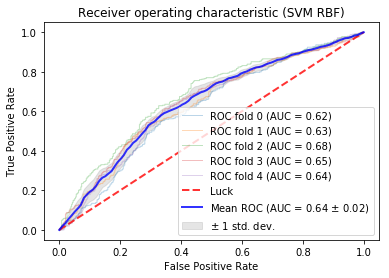

In [60]:
# plot roc curve for cross validation
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve, auc
from scipy import interp
# Classification and ROC analysis

# Run classifier with cross-validation and plot ROC curves
cv = StratifiedKFold(n_splits=5)
# classifier = svm.SVC(kernel='linear', probability=True,
#                      random_state=random_state)
svmrbf = svm.SVC(C=0.1, gamma=1e-5, probability=True)
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

i = 0
for train, test in cv.split(final_X_train, y_train.values):
    probas_ = svmrbf.fit(final_X_train[train], y_train.values[train]).predict_proba(final_X_train[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y_train.values[test], probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

    i += 1
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Luck', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (SVM RBF)')
plt.legend(loc="lower right")
plt.show()